### IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Reading data on Investment Rounds in 2008-18 from investments input

In [2]:
#Reading Total Investments Data for all Companies in the sector between 2008-18

df_inv = pd.read_csv('./input_data/investmentInput.csv')

df_inv.head(3)

,Year,Org_Name,Funding_Round_Type,Funding_Amt_USD,Funding_Stage
0,2018,Zelros,Series A,4532800,Early Stage
1,2018,Axyon AI,Series Unknown,1473160,Uncategorized
2,2018,Oriente,Series A,105000000,Early Stage



### 2. Defining functions to extract data on YoY  rounds by Stage, plot and save results

#### a. Series Extractor Function

In [3]:
def RoundsOrFundingByStage(fundingStage,df_inp,get_rounds=False, get_amount=False):
    
    #Extracting stage wise data from df_inp to df_stage
    df_stage = df_inp[df_inp['Funding_Stage']==fundingStage]
    
    #Grouping data by Year in stage
    group = df_stage.groupby(by='Year',axis=0)
    
    #Deleting dataframe df_inp and df_stage
    del df_inp
    del df_stage
    
    if(get_rounds==True):
    
        # Getting series on YoY Funding Rounds for particular stage
        stage_rounds_ser = group['Org_Name'].count()
    
        return stage_rounds_ser

    if(get_amount==True):
    
        #Getting series on YoY Funding Amount for particular stage
        stage_amt_ser = group['Funding_Amt_USD'].sum()
        
        return stage_amt_ser

#### b. Function to generate df from stage series

In [4]:
def dfGenFromStageSeries(seed_ser, early_stage_ser, late_stage_ser):
    # Creating dataframe from above series
    df_all_stages = pd.DataFrame({'Seed':seed_ser,
                                       'Early Stage': early_stage_ser,
                                       'Late Stage': late_stage_ser
                                      })
    # Filling Na Values
    df_all_stages.fillna(0, inplace=True)

    # Renaming index
    df_all_stages.index.name='Year'

    # Resetting index
    df_all_stages.reset_index(drop=False,inplace=True)
    
    return df_all_stages
    

#### c. Plotter Function

In [5]:
def PlotRoundsOrFundingByStage(df_inp, plotTitle):

    sns.set(style="white", rc={"lines.linewidth": 3})

    ax = df_inp.plot.area(x='Year',stacked=True, figsize = (8, 6))

    ax.set_title(plotTitle ,fontdict={'fontsize':13,'fontweight':'bold'})

    ax.legend() 

    ax.set(xlabel='Year', ylabel='Funding Amount in USD')

    plt.xticks(np.arange(start=2008, stop=2019, step=1))

    sns.set()

### 3. Year on Year – Number of Rounds by Stage

#### Extracting data

In [6]:
# YoY No. of Funding Rounds in Seed stage
seed_rounds_ser = RoundsOrFundingByStage('Seed',df_inv,get_rounds=True)

# YoY No. of Funding Rounds in Early stage
early_stage_rounds_ser = RoundsOrFundingByStage('Early Stage',df_inv,get_rounds=True)

# YoY No. of Funding Rounds in Late stage
late_stage_rounds_ser = RoundsOrFundingByStage('Late Stage',df_inv,get_rounds=True)

#Generate dataframe from extracted series 
df_rounds = dfGenFromStageSeries(seed_rounds_ser, early_stage_rounds_ser, late_stage_rounds_ser)

In [7]:
df_rounds.head(3)

,Year,Seed,Early Stage,Late Stage
0,2008,0.0,1.0,0.0
1,2009,1.0,0.0,0.0
2,2010,4.0,0.0,0.0


#### Plotting results

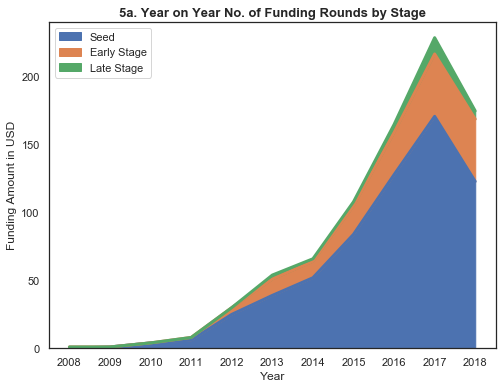

In [8]:
#Plotting results from df_rounds

plotTitle = '5a. Year on Year No. of Funding Rounds by Stage'

PlotRoundsOrFundingByStage(df_rounds, plotTitle)

#Saving to output png file

plt.savefig('./output/plots/5a_YoY-Funding_Rounds_by_Stage.png', dpi=100)

### 4. Year on Year – Funding Amount  by Stage

#### Extracting data

In [9]:
# YoY No. of Funding Amount in Seed stage
seed_amt_ser = RoundsOrFundingByStage('Seed',df_inv, get_amount=True)

# YoY No. of Funding Rounds in Early stage
early_stage_amt_ser = RoundsOrFundingByStage('Early Stage',df_inv, get_amount=True)

# YoY No. of Funding Rounds in Late stage
late_stage_amt_ser = RoundsOrFundingByStage('Late Stage',df_inv, get_amount=True)

#Generate dataframe from extracted series 
df_amt = dfGenFromStageSeries(seed_amt_ser, early_stage_amt_ser, late_stage_amt_ser)

#### Plotting results

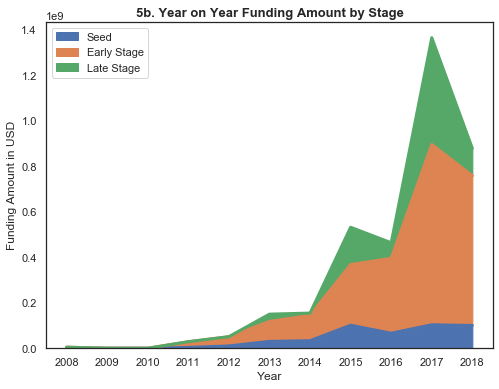

In [10]:
#Plotting results from df_amt

plotTitle = '5b. Year on Year Funding Amount by Stage'

PlotRoundsOrFundingByStage(df_amt, plotTitle)

#Saving to output png file

plt.savefig('./output/plots/5b_YoY-Funding_Amount_by_Stage.png', dpi=100)

### 5. Saving results to file

In [11]:
# Writing data to output excel file

from openpyxl import load_workbook

book = load_workbook('./output/outputData.xlsx')

writer = pd.ExcelWriter('./output/outputData.xlsx', engine='openpyxl')

writer.book = book

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

df_rounds.to_excel(writer, '5a.YoY-Rounds_by_Stage', index=False)

df_amt.to_excel(writer,'5b.YoY-Funding_by_Stage', index=False)

writer.save()

### 6.  Deleting dataframes

In [12]:
del df_inv
del df_rounds
del df_amt